## Calculando Matriz de Confusão Manualmente

In [8]:
classificados = pd.read_csv('submission.csv')
classificados.head()

,content,programacao orientada a objeto,linguagem de marcacao,banco de dados,linguagem de script
0,package telas import main programaprincipal mo...,0.967324,0.018103,0.005611,0.029743
1,to change this license header choose headers i...,0.941868,0.024524,0.004905,0.033939
2,package main import telas telaprincipal modelo...,0.962034,0.010019,0.005144,0.011803
3,to change this license header choose headers i...,0.890534,0.007565,0.024002,0.014741
4,package modelos import java io serializable se...,0.961021,0.004265,0.009427,0.006270


In [9]:
col_poo = classificados['programacao orientada a objeto']
col_poo.head()

0    0.967324
1    0.941868
2    0.962034
3    0.890534
4    0.961021
Name: programacao orientada a objeto, dtype: float64

In [10]:
col_lm = classificados['linguagem de marcacao']
col_lm.head()

0    0.018103
1    0.024524
2    0.010019
3    0.007565
4    0.004265
Name: linguagem de marcacao, dtype: float64

In [11]:
col_bd = classificados['banco de dados']
col_bd.head()

0    0.005611
1    0.004905
2    0.005144
3    0.024002
4    0.009427
Name: banco de dados, dtype: float64

In [12]:
col_ls = classificados['linguagem de script']
col_ls.head()

0    0.029743
1    0.033939
2    0.011803
3    0.014741
4    0.006270
Name: linguagem de script, dtype: float64

In [13]:
col_poo_array = col_poo.values
col_poo_array

array([0.96732355, 0.9418678 , 0.96203413, ..., 0.0106134 , 0.00286718,
       0.01518769])

In [14]:
col_lm_array = col_lm.values
col_lm_array

array([0.01810293, 0.024524  , 0.01001853, ..., 0.0068414 , 0.00556231,
       0.01230414])

In [15]:
col_bd_array = col_bd.values
col_bd_array

array([0.00561146, 0.0049053 , 0.0051436 , ..., 0.0029866 , 0.00314387,
       0.0036175 ])

In [17]:
col_ls_array = col_ls.values
col_ls_array

array([0.02974293, 0.0339389 , 0.01180257, ..., 0.98762538, 0.99912552,
       0.91186138])

In [34]:
# tansformando com base no limiar minimo
array_bin_col_poo = []
array_bin_col_lm = []
array_bin_col_bd = []
array_bin_col_ls = []
for i in range(len(col_poo_array)):
    
    if col_poo_array[i] >= 0.7:
        array_bin_col_poo.append(1)
    else: array_bin_col_poo.append(0)
    
    if col_lm_array[i] >= 0.7:
        array_bin_col_lm.append(1)
    else: array_bin_col_lm.append(0)
        
    if col_bd_array[i] >= 0.7:
        array_bin_col_bd.append(1)
    else: array_bin_col_bd.append(0)
        
    if col_ls_array[i] >= 0.7:
        array_bin_col_ls.append(1)
    else: array_bin_col_ls.append(0)   
    

In [19]:
# carregando o aqruivo real para comparação
test_real = pd.read_csv('dataset-test-real.csv')
test_real.head()

,programacao orientada a objeto,linguagem de marcacao,banco de dados,linguagem de script,content
0,1,0,0,0,package telas import main programaprincipal mo...
1,1,0,0,0,to change this license header choose headers i...
2,1,0,0,0,package main import telas telaprincipal modelo...
3,1,0,0,0,to change this license header choose headers i...
4,1,0,0,0,package modelos import java io serializable se...


In [20]:
col_poo_real = test_real['programacao orientada a objeto']
col_poo_real.head()

0    1
1    1
2    1
3    1
4    1
Name: programacao orientada a objeto, dtype: int64

In [21]:
col_lm_real = test_real['linguagem de marcacao']
col_lm_real.head()

0    0
1    0
2    0
3    0
4    0
Name: linguagem de marcacao, dtype: int64

In [22]:
col_bd_real = test_real['banco de dados']
col_bd_real.head()

0    0
1    0
2    0
3    0
4    0
Name: banco de dados, dtype: int64

In [23]:
col_bd_real = test_real['banco de dados']
col_bd_real.head()

0    0
1    0
2    0
3    0
4    0
Name: banco de dados, dtype: int64

In [24]:
col_ls_real = test_real['linguagem de script']
col_ls_real.head()

0    0
1    0
2    0
3    0
4    0
Name: linguagem de script, dtype: int64

In [33]:
col_poo_array_real = col_poo_real.values
col_poo_array_real

array([1, 1, 1, ..., 0, 0, 0])

In [26]:
col_lm_array_real = col_lm_real.values
col_lm_array_real

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
col_bd_array_real = col_bd_real.values
col_bd_array_real

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
col_ls_array_real = col_ls_real.values
col_ls_array_real

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# --------------------

In [53]:
import numpy as np

valores_reais    = col_ls_array_real
valores_preditos = array_bin_col_ls

def get_confusion_matrix(reais, preditos, labels):
    """
    Uma função que retorna a matriz de confusão para uma classificação binária
    
    Args:
        reais (list): lista de valores reais
        preditos (list): lista de valores preditos pelo modelos
        labels (list): lista de labels a serem avaliados.
            É importante que ela esteja presente, pois usaremos ela para entender
            quem é a classe positiva e quem é a classe negativa
    
    Returns:
        Um numpy.array, no formato:
            numpy.array([
                [ tp, fp ],
                [ fn, tn ]
            ])
    """
    # não implementado
    if len(labels) > 2:
        return None

    if len(reais) != len(preditos):
        return None
    
    # considerando a primeira classe como a positiva, e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores preditos corretamente
    tp = 0
    tn = 0
    
    # valores preditos incorretamente
    fp = 0
    fn = 0
    
    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # se trata de um valor real da classe positiva
        if v_real == true_class:
            tp += 1 if v_predito == v_real else 0
            fp += 1 if v_predito != v_real else 0
        else:
            tn += 1 if v_predito == v_real else 0
            fn += 1 if v_predito != v_real else 0
    
    return np.array([
        # valores da classe positiva
        [ tp, fp ],
        # valores da classe negativa
        [ fn, tn ]
    ])

get_confusion_matrix(reais=valores_reais, preditos=valores_preditos, labels=[1,0])
# array([[3, 1], [2, 4]])

array([[ 997,  174],
       [   0, 2191]])

## Calculando Matriz de Confusão com Lib

In [55]:
confusion_matrix = confusion_matrix(col_ls_array_real, array_bin_col_ls)
print(confusion_matrix)

[[2191    0]
 [ 174  997]]


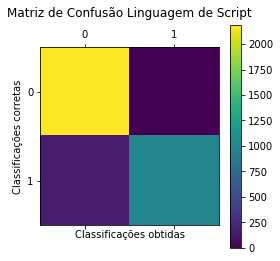

In [56]:
plt.matshow(confusion_matrix)
plt.title("Matriz de Confusão Linguagem de Script\n")
plt.colorbar()
plt.ylabel("Classificações corretas")
plt.xlabel("Classificações obtidas")
plt.show()